# Problem 1

## a) 

a) Given Ω(S, N) where S is the starting digit and N is the number of digit to be dialed and the result should be the number of distinct numbers that could be dialed. Also given A, a 10 X 10 matrix having a 1 for all allowable moves from i to j = 1. 

It follows that all possible moves can be represented as branches in a tree, dependent on the moves before it. Therefore, given a starting place S, the number of possible numbers having N digits can be found by determining the number of possible digits for N-1 and determining how many allowable moves exist from there. The sum of all possible branches from 1 digit to N digits will give the number of distinct numbers that could be dialed. 

 

Ω(S, N) = Ω(S, 0) + Ω(S, 1) + … + Ω(S, N-1) = SUM (for k∈{j|ASj=1} ) of Ω(k, N − 1) 

## b) 

b) Given that Ω(N) = A x Ω(N − 1),  
Ω(N − 1) = A x Ω(N − 2) x … x Ω(1) = A x A x A … x Ω(1) 

## c) Create a NumPy matrix for A. Transpose is equal to A. I expected this because after making a move, that same move can be made backwards.

In [1]:
import numpy as np

In [2]:
A=[ [0,0,0,0,0,0,0,0,1,0],
    [0,0,1,0,1,0,0,0,0,0],
    [0,1,0,1,0,1,0,0,0,0],
    [0,0,1,0,0,0,1,0,0,0],
    [0,1,0,0,0,1,0,1,0,0],
    [0,0,1,0,1,0,1,0,1,0],
    [0,0,0,1,0,1,0,0,0,1],
    [0,0,0,0,1,0,0,0,1,0],
    [1,0,0,0,0,1,0,1,0,1],
    [0,0,0,0,0,0,1,0,1,0]]

In [3]:
A_transpose=np.transpose(A)
A_transpose==A

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

## D) Create Dialer_Problem

In [4]:
def Dialer_Problem(S,N):
    # define omega(1)
    Om_one=np.matrix([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]])
    
    # define A, the matrix of allowable moves
    A=[ [0,0,0,0,0,0,0,0,1,0],
    [0,0,1,0,1,0,0,0,0,0],
    [0,1,0,1,0,1,0,0,0,0],
    [0,0,1,0,0,0,1,0,0,0],
    [0,1,0,0,0,1,0,1,0,0],
    [0,0,1,0,1,0,1,0,1,0],
    [0,0,0,1,0,1,0,0,0,1],
    [0,0,0,0,1,0,0,0,1,0],
    [1,0,0,0,0,1,0,1,0,1],
    [0,0,0,0,0,0,1,0,1,0]]
    
    # set output to Om_one
    output = Om_one
    # loop as defined by N
    if N==1:
        return output[S,0]
    else:
        for i in range(1,N):
            output = A * output
        return output[S,0]

In [5]:
Dialer_Problem(5,10)

18713

In [6]:
Dialer_Problem(0,4)

9

## E) Rewrite without NumPy

In [7]:
def Dialer_No_Numpy(S,N):
    A=[ [0,0,0,0,0,0,0,0,1,0],
    [0,0,1,0,1,0,0,0,0,0],
    [0,1,0,1,0,1,0,0,0,0],
    [0,0,1,0,0,0,1,0,0,0],
    [0,1,0,0,0,1,0,1,0,0],
    [0,0,1,0,1,0,1,0,1,0],
    [0,0,0,1,0,1,0,0,0,1],
    [0,0,0,0,1,0,0,0,1,0],
    [1,0,0,0,0,1,0,1,0,1],
    [0,0,0,0,0,0,1,0,1,0]]
    
    Om_one=[[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]]
    
    output = Om_one
    # loop as defined by N
    if N==1:
        return output[S]
    else:
        for i in range(1,N):
            output = [[sum(x*y for x,y in zip(A_row,output_col)) for output_col in zip(*output)] for A_row in A]
        return output[S]

In [8]:
Dialer_No_Numpy(1,1)

[1]

## f) evaluate and plot efficiency of NumPy code

In [9]:
import time
import matplotlib.pylab as plt

In [10]:
def Dialer_Problem_timed(S,N):
    t1=time.time()
    # define omega(1)
    Om_one=np.matrix([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]])
    
    # define A, the matrix of allowable moves
    A=[ [0,0,0,0,0,0,0,0,1,0],
    [0,0,1,0,1,0,0,0,0,0],
    [0,1,0,1,0,1,0,0,0,0],
    [0,0,1,0,0,0,1,0,0,0],
    [0,1,0,0,0,1,0,1,0,0],
    [0,0,1,0,1,0,1,0,1,0],
    [0,0,0,1,0,1,0,0,0,1],
    [0,0,0,0,1,0,0,0,1,0],
    [1,0,0,0,0,1,0,1,0,1],
    [0,0,0,0,0,0,1,0,1,0]]
    
    # set output to Om_one
    output = Om_one
    # loop as defined by N
    if N==1:
        return time.time()-t1
    else:
        for i in range(1,N):
            output = A * output
        return time.time()-t1

In [11]:
Dialer_Problem_timed(5,10)

0.004118919372558594

In [12]:
def Plot_Dialer_Times():
    N=range(1,1000)
    times=[]
    for i in range(1,1000):
        times.append(Dialer_Problem_timed(0,i))
    #return output
    times=np.array(times)
    
    plt.figure(figsize=(8,8))
    plt.plot(N,times,c='darkblue')
    plt.xlabel('N', fontsize=15)
    plt.ylabel('Execution Time (ms)', fontsize=15)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    plt.show()
    

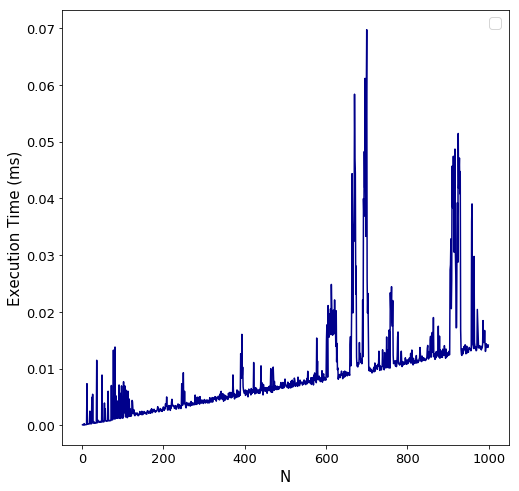

In [13]:
Plot_Dialer_Times()

## g) Extrapolate runtime for N=10^7

In [14]:
Dialer_Problem_timed(0,1)

0.00010585784912109375

In [15]:
Dialer_Problem_timed(0,1000)

0.05164909362792969

In [16]:
Runtime= 0.00035 + (0.081-0.00035)*10000000
Runtime_minutes=(Runtime/1000)/60
print "Runtime (min):", Runtime_minutes

Runtime (min): 13.4416666725


Runtime is 13.4 minutes

## h) write a function to convert from decimal number to binary

In [17]:
def decimalToBinary(n):  
    
    # init list
    output_list = []
    output_str = ''
    
    # divides by 2, appending remainders to list
    while n // 2>0:
        output_list.append(n%2)
        n= int(n // 2)
    
    # account for case when the last remainder is 1
    if n // 2 == 0:
        output_list.append(1)
    
    # print reverse list of remainders to generate binary
    for i in reversed(output_list):
        output_str = output_str + str(i)
    
    return int(output_str)

In [18]:
decimalToBinary(22)

10110

## i) rebuild dialer_problem with binary exponential representation

In [19]:
def Dialer_Problem_Bin(S,N):
    # define Omega(1)
    Om_one=np.matrix([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]])
    
    output = Om_one
    
    # if N==1, return value now and skip rest of program
    if N==1:
        return output[S,0]
    
    # define A, the matrix of allowable moves
    A=np.matrix([ [0,0,0,0,0,0,0,0,1,0],
    [0,0,1,0,1,0,0,0,0,0],
    [0,1,0,1,0,1,0,0,0,0],
    [0,0,1,0,0,0,1,0,0,0],
    [0,1,0,0,0,1,0,1,0,0],
    [0,0,1,0,1,0,1,0,1,0],
    [0,0,0,1,0,1,0,0,0,1],
    [0,0,0,0,1,0,0,0,1,0],
    [1,0,0,0,0,1,0,1,0,1],
    [0,0,0,0,0,0,1,0,1,0]])
    
    # convert N-1 to binary number
    n=N-1
    bin_list=[]
    
    while n // 2>0:
        bin_list.append(n%2)
        n= int(n // 2)
    if n // 2 == 0:
        bin_list.append(1)
        #bin_list now holds reversed binary rep of N-1
    # print bin_list
    
    A_base = A
    
    # loop through array to produce A term by binary representation
    for i in bin_list:
        # output init as Om_one
        output = (A_base ** i) * output
        
        # multiply A_base by itself to get next term
        A_base = A_base * A_base
        
    return output[S,0]

In [20]:
Dialer_Problem_Bin(5,10)

18713

In [21]:
A=np.matrix([ [0,0,0,0,0,0,0,0,1,0],
    [0,0,1,0,1,0,0,0,0,0],
    [0,1,0,1,0,1,0,0,0,0],
    [0,0,1,0,0,0,1,0,0,0],
    [0,1,0,0,0,1,0,1,0,0],
    [0,0,1,0,1,0,1,0,1,0],
    [0,0,0,1,0,1,0,0,0,1],
    [0,0,0,0,1,0,0,0,1,0],
    [1,0,0,0,0,1,0,1,0,1],
    [0,0,0,0,0,0,1,0,1,0]])
Om_one=np.matrix([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]])
(A **2) * (A **3) *Om_one

matrix([[ 76],
        [131],
        [210],
        [131],
        [216],
        [273],
        [216],
        [142],
        [253],
        [142]])

## j)  time the binary implementation

In [22]:
def Dialer_Bin_Timed(S,N):
    t1=time.time()
    
    # define Omega(1)
    Om_one=np.matrix([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]])
    
    output = Om_one
    
    # if N==1, return value now and skip rest of program
    if N==1:
        return output[S,0]
    
    # define A, the matrix of allowable moves
    A=np.matrix([ [0,0,0,0,0,0,0,0,1,0],
    [0,0,1,0,1,0,0,0,0,0],
    [0,1,0,1,0,1,0,0,0,0],
    [0,0,1,0,0,0,1,0,0,0],
    [0,1,0,0,0,1,0,1,0,0],
    [0,0,1,0,1,0,1,0,1,0],
    [0,0,0,1,0,1,0,0,0,1],
    [0,0,0,0,1,0,0,0,1,0],
    [1,0,0,0,0,1,0,1,0,1],
    [0,0,0,0,0,0,1,0,1,0]])
    
    # convert N-1 to binary number
    n=N-1
    bin_list=[]
    
    while n // 2>0:
        bin_list.append(n%2)
        n= int(n // 2)
    if n // 2 == 0:
        bin_list.append(1)
        #bin_list now holds reversed binary rep of N-1
    
    A_base = A
    
    # loop through array to produce A term by binary representation
    for i in bin_list:
        # output init as Om_one
        output = (A_base ** i) * output
        
        # multiply A_base by itself to get next term
        A_base = A_base * A_base
        
    return time.time()-t1

In [23]:
def Plot_Bin_Dialer_Times():
    N=range(1,1000)
    times=[]
    for i in range(1,1000):
        times.append(Dialer_Bin_Timed(0,i))
    #return output
    times=np.array(times)
    
    plt.figure(figsize=(8,8))
    plt.plot(N,times,c='darkblue')
    plt.xlabel('N', fontsize=15)
    plt.ylabel('Execution Time (ms)', fontsize=15)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    plt.show()

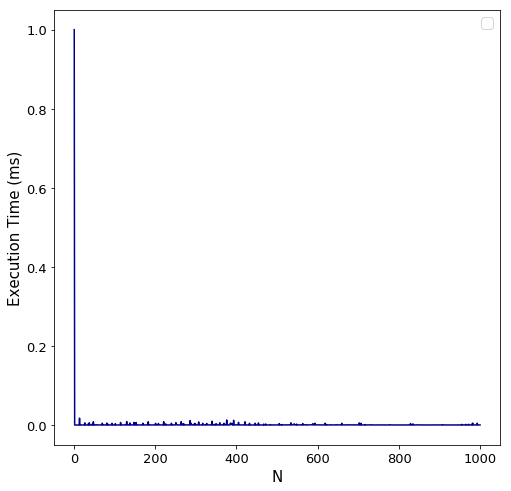

In [24]:
Plot_Bin_Dialer_Times()

## k) Execution time is much faster.

# Problem 2

## a) create NumPy matrix and find covariance

In [25]:
D = np.matrix([[1.72, 0.10],[-0.58,0.31],[1.99,1.54],[1.60,4.97],[2.72,2.43],[2.83,3.59],[5.95,7.71],[4.75,7.63],[5.57,5.60],[9.82,7.91]])
D

matrix([[ 1.72,  0.1 ],
        [-0.58,  0.31],
        [ 1.99,  1.54],
        [ 1.6 ,  4.97],
        [ 2.72,  2.43],
        [ 2.83,  3.59],
        [ 5.95,  7.71],
        [ 4.75,  7.63],
        [ 5.57,  5.6 ],
        [ 9.82,  7.91]])

In [30]:
D_cov = np.cov(D.T)
D_cov

array([[8.70742333, 7.41923   ],
       [7.41923   , 9.21336556]])

## b) find eigenvalues and corresponding eigenvectors of D_cov using NumPy. Name eigenvector with the most variance v

In [31]:
from numpy import linalg as LA
E = LA.eig(D_cov)
E
# find eigenvector with the highest eigenvalue

(array([ 1.53685296, 16.38393593]), array([[-0.71905385, -0.69495436],
        [ 0.69495436, -0.71905385]]))

Highest Eigenvalue is the second one, therefore second eigenvector shows the direction with the most variance.

In [33]:
v=E[1].T[1]
v

array([-0.69495436, -0.71905385])

## c) take dot product of D and v

In [34]:
output = np.dot(D,v)
output

matrix([[ -1.26722688,   0.18016683,  -2.4903021 ,  -4.68562461,
          -3.63757671,  -4.54812416,  -9.67888362,  -8.78741408,
          -7.89759734, -12.51216776]])